
<hr style="border: solid 1px red; margin-bottom: -1% ">
# Session 4: SciPy
<hr style="border: solid 1px red; margin-top: 1.5% ">




<br>
<hr style="border: solid 1px red; margin-bottom: 2% ">
## Overview
<hr style="border: solid 1px red; margin-bottom: -1%; ">
<br>

* NumPy provides arrays and limited additional functionality


* SciPy builds on NumPy and provides additional modules:
  * Linear Algebra and wrappers to LAPACK & BLAS `scipy.linalg`
  * Numerical Integration `scipy.integrate` 
  * Interpolation `scipy.interpolate`
  * Optimisation `scipy.optimize` 
  * Special functions `scipy.special`
  * Signal processing `scipy.signal`
  * Image Processing `scipy.ndimage`
  * Fourier transforms `scipy.fftpack`
  * Statistical functions `stats` 
  * Spatial data structures and algorithms `scipy.spatial`
  * File I/O e.g. to read MATLAB files `scipy.io`
  <br>

<br>
<hr style="border: solid 1px red; margin-bottom: 2% ">
## Useful links
<hr style="border: solid 1px red; margin-bottom: -1%; ">
<br>

* Note: no PDE solvers (though other packages exist) 


* Documentation: 
  * <p style="font-size: 100%"> http://docs.scipy.org/doc/scipy/reference/tutorial/ </p>
  
  * <p style="font-size: 100%"> http://docs.scipy.org/doc/scipy/reference/ </p>
  
  * <p style="font-size: 100%"> http://scipy-cookbook.readthedocs.org </p>

<br>
<hr style="border: solid 1px red; margin-bottom: 2% ">
## Linear algebra
<hr style="border: solid 1px red; margin-bottom: -1%; ">
<br>

* Wider set of linear algebra operations than in Numpy 

  * <p style="font-size: 100%">various decompositions (eigen, singular value)</p>
  * <p style="font-size: 100%">matrix exponentials, trigonometric functions</p> 
  * <p style="font-size: 100%">particular matrix equations and special matrics</p>
  * <p style="font-size: 100%">low-level LAPACK and BLAS routines</p>
  
  
* Routines also for sparse matrices
  * <p style="font-size: 100%">storage formats</p> 
  * <p style="font-size: 100%">iterative algorithms</p>

<br>
<hr style="border: solid 1px red; margin-bottom: 2% ">
## Example: Matrix inverse
<hr style="border: solid 1px red; margin-bottom: -1%; ">
<br>
Consider:

$$
A = \left[ \begin{array}
{rrr}
1 & 3 & 5 \\
 2 & 5 & 1 \\
 2 & 3 & 8 \\
\end{array} \right]
$$

The inverse of $A$ is

$$
A^{-1} = 
\frac{1}{25} \left[ \begin{array}
{rrr}
-37 & 9 & 22\\
14 & 2 & -9 \\ 
4 & -3 & 1\\
\end{array} \right]
\approx
\left[ \begin{array}
{rrr}
-1.48 & 0.36 &  0.88\\
-0.56 &  0.08 & -0.36 \\ 
0.16 & -0.12 &  0.04\\
\end{array} \right]
$$

which may be confirmed by checking $A A^{-1} = I$ where $I$ is the identity.


<br>
<hr style="border: solid 1px red; margin-bottom: 2% ">
## Exercise 1: Matrix inverse
<hr style="border: solid 1px red; margin-bottom: -1%; ">
<br>

Find inverse of matrix A (as defined above). Check the result by multiplying out  $A A^{-1}$ , which should give 
identity matrix  $I$

In [1]:
# numpy has a function to produce the 2D identity matrix I
# query: ?np.eye

from scipy import linalg
A = ...

Exercise: Simple single integral

<br>
<hr style="border: solid 1px red; margin-bottom: 2% ">
## Integration: `scipy.integrate`
<hr style="border: solid 1px red; margin-bottom: -1%; ">
<br>

* Routines for numerical integration – single, double and triple integrals 
* Can solve Ordinary Differential Equations (ODEs) with initial conditions

### Example : Double integral
Calculate $\pi$ using the double integral for the area of a circle with radius $r$: <br>

$$
\int _{x_{min}} ^{x_{max}}\, dx \int _{g(x)} ^{h(x)} f(x,y) \, dy = \int _{-r} ^{r} \int _{-\sqrt(r^2-x^2)} ^{\sqrt(r^2-x^2)} 1 \, dx\, dy = \pi r^2
$$

We will solve this with `scipy.integrate.dblquad()`

http://docs.scipy.org/doc/scipy-0.17.0/reference/generated/scipy.integrate.dblquad.html
<br>
<br>

In [2]:
# numerically integrate using dblquad()

import numpy as np
from scipy.integrate import dblquad

# order of variables matters! y before x

def integrand(y, x):
    return 1

def xminlim(x, r):
    return -1*np.sqrt(r*r - x*x)

def xmaxlim(x, r):
    return np.sqrt(r*r - x*x)

# integral for the area of a circle with radius r
def integrate_to_pi(r): 
    (area,err) = dblquad(integrand, -1*r, r, 
                         lambda x: xminlim(x,r), 
                         lambda x: xmaxlim(x,r))
    return area/(r*r)


<br>
<hr style="border: solid 1px red; margin-bottom: 2% ">
## Integration : Check result
<hr style="border: solid 1px red; margin-bottom: -1%; ">
<br>

Calculate the result and compare with the standard `numpy.pi`

In [4]:
# %load pi_integration_check.py
# calculate pi using numerical integration and check result against numpy constant np.pi

print (integrate_to_pi(1.0))

# compare with numpy pi
print (np.pi - integrate_to_pi(1.0))

# can try timing... (uncomment line below)
# %timeit integrate_to_pi(1.0) 


3.1415926535897967
-3.552713678800501e-15


<br>
<hr style="border: solid 1px red; margin-bottom: 2% ">
## Exercise : Double integral
<hr style="border: solid 1px red; margin-bottom: -1%; ">
<br>

Calculate the double integral

$$
\int_0^{\pi/2} dx \int_0^1 dy \quad f(x,y)
$$

where $f(x,y) = y sin(x)$. The answer should be 1/2.
<br>
<br>

In [5]:
# Use the same approach here as above

def integrand1(y,x):
    return y*np.sin(x)

area, err = dblquad(integrand1, 0.0, 0.5*np.pi, lambda x: 0.0, lambda x: 1.0)
print area, err

SyntaxError: Missing parentheses in call to 'print' (<ipython-input-5-98fd5ef896f4>, line 7)

<br>
<hr style="border: solid 1px red; margin-bottom: 2% ">
## Solution : Double integral
<hr style="border: solid 1px red; margin-bottom: -1%; ">
<br>

In [7]:
# %load integration.py
# Integral x = [0, pi/2] y = [0, 1] f(x,y) = ysin(x)
# numerically solve the integral using dblquad

import numpy as np
from scipy.integrate import dblquad

# order of arguments matters!
def integrand(y,x): 
    return y*np.sin(x)

# integrate f(x, y) = y * sin (x)
def integrate_this(): 
    (area,err) = dblquad(integrand, 0,np.pi/2, 
                         lambda x: 0, 
                         lambda x: 1)
    return area

integrate_this()


0.5

<br>
<hr style="border: solid 1px red; margin-bottom: 2% ">
## Example : Pendulum
<hr style="border: solid 1px red; margin-bottom: -1%; ">
<br>

Solve Ordinary Differential Equations (ODEs) with initial conditions, for example motion of simple pendulum.

A point mass, $m$, is attached to the end of a massless rigid rod of length $l$. The pendulum is acted on by gravity and friction. We can describe the resulting motion of the pendulum by angle, $\theta$, it makes with the vertical. 

<img src="pendulum.png"; style="float: right; width: 40%; margin-right: 3%; margin-top: 0%; margin-bottom: -1%">  <br>

Assuming angle $\theta$ always remains small, we can write a second-order differential equation to describe the motion of the mass according to Newton's 2nd law of motion, $m\,a = F$, in terms of $\theta$:

$$
\ddot{\theta} = -\frac{g}{l}\,\theta - \frac{b}{m}\,\dot\theta
$$

where $b$ is a constant of friction and $b \ll g$.


To use `odeint`, we rewrite the above equation as 2 first-order differential equations:


$
\dot{\theta} = \omega
$

$
\dot{\omega}= -\frac{g}{l}\,\theta - \frac{b}{m}\,\omega
$

</p>



<br>
<hr style="border: solid 1px red; margin-bottom: 2% ">
## Pendulum (cont.)
<hr style="border: solid 1px red; margin-bottom: -1%; ">
<br>

<p style="font-size: 100%"> Define the ODE as a function and set up parameters and initial values. </p>

In [8]:
# ode as a function

# let y be vector  [theta, omega]
def pendulumNumerical(y, t, b, m, g, l):
    theta, omega = y
    dydt = [omega, -(b/m)*omega - (g/l)*(theta)]
    return dydt

In [9]:
# Parameters and initial values
m = 1.0                # mass of bob
l = 1.0                # length of pendulum
b = 0.25               # friction constant
g = 9.81               # gravitational constant
theta0 = np.pi-0.01    # initial angle
w0 = 0.0               # initial omega

# create a vector with the initial angle and initial omega
y0 = [theta0, w0]

In [10]:
# time interval
stoptime = 10         # total number of seconds
numpoints = 101       # number of points interval

t = np.linspace(0, stoptime, numpoints);

In [11]:
# ODE solver parameters
abserr = 1.0e-8      # absolute error tolerance
relerr = 1.0e-6      # relative error tolerance

<br>
<hr style="border: solid 1px red; margin-bottom: 2% ">
## Pendulum (cont.)
<hr style="border: solid 1px red; margin-bottom: -1%; ">
<br>

Use <i>odeint</i> to numerically solve the ODE with initial conditions.

In [12]:
# import odeint solver
from scipy.integrate import odeint

In [13]:
# get solution. Note args are given as a tuple
solution = odeint(pendulumNumerical, y0, t, args=(b,m,g,l),atol=abserr, rtol=relerr)

The ODE can be solved analytically. The exact solutions for $\theta$ and $\omega$ are:

In [14]:
# Exact solution for theta
def pendulumTheta(t, theta0, b, m, g, l):
    root = np.sqrt( np.abs( (b*b)-4*g*m*m/l ) )
    sol = theta0*np.exp(-b*t/2)*( np.cos( root*t/2 ) + (b/root)*np.sin( root*t/2) )
    return sol

In [15]:
# Exact solution for omega
def pendulumOmega(t, theta0, b, m, g, l):
    root = np.sqrt( np.abs( (b*b)-4*g*m*m/l ) )
    sol = -(b/2)*theta0*np.exp(-b*t/2)*( np.cos( root*t/2 ) + (b/root)*np.sin( root*t/2) ) + (theta0/2)*np.exp(-b*t/2)*( b*np.cos( root*t/2 ) - root*np.sin( root*t/2) )
    return sol

<br>
<hr style="border: solid 1px red; margin-bottom: 2% ">
## Exercise : Pendulum
<hr style="border: solid 1px red; margin-bottom: -1%; ">
<br>

To see how good the numerical solutions for $\theta$ and $\omega$ are, plot the exact solutions against the
numerical solutions for the appropriate range of $t$.

You should include a legend to label the different lines/points.

You should find that the numerical solution looks quite good. Can you adjust the parameters above
(re-execute all the relevant cells) to make it worse?

<br>
<hr style="border: solid 1px red; margin-bottom: 2% ">
## Solution : Pendulum
<hr style="border: solid 1px red; margin-bottom: -1%; ">
<br>

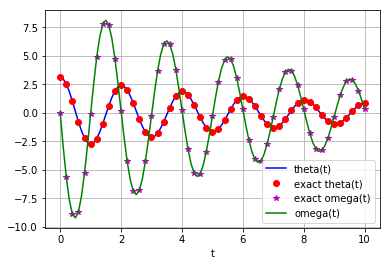

In [17]:
# %load pendulum.py
# Plot the numerical and exact solutions for a simple pendulum

# to inline plots in a notebook, uncomment line below
%matplotlib inline

import numpy as np

import matplotlib.pyplot as plt
plt.plot(t, solution[:, 0], 'b', label='theta(t)')
plt.plot(t[0::2], pendulumTheta(t[0::2],theta0,b,m,g,l), 'ro', label='exact theta(t)')
plt.plot(t[0::2], pendulumOmega(t[0::2],theta0,b,m,g,l), 'm*', label='exact omega(t)')
plt.plot(t, solution[:, 1], 'g', label='omega(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()



<br>
<hr style="border: solid 1px red; margin-bottom: 2% ">
## Optimisation
<hr style="border: solid 1px red; margin-bottom: -1%; ">
<br>

* Several classical optimisation algorithms
  * Least squares fitting
  * Quasi-Newton type optimisations
  * Simulated annealing
  * General purpose root finding


<br>
<hr style="border: solid 1px red; margin-bottom: 2% ">
## Least-squares fit
<hr style="border: solid 1px red; margin-bottom: -1%; ">
<br>

Use `scipy.optimize.leastsq` to fit some measured data, $\{x_i,\,y_i\}$, to a function:

$$
y\,=\,A\,\sin(2\pi k x \,+\, \theta)
$$

where the parameters $A$, $k$, and $\theta$ are unknown. The residual vector, that will be squared and summed by `leastsq` to fit the data, is:

$$
e_i\,=\, ∣∣ \, y_i \,− \,A\sin(2\pi k x_i + \theta)∣∣
$$

By defining a function to compute the residuals, $e_i$, and, selecting appropriate starting values, `leastsq` can be used to find the best-fit parameters $\hat{A}$, $\hat{k}$, $\hat{\theta}$.

<br>
<hr style="border: solid 1px red; margin-bottom: 2% ">
## Least-squares fit
<hr style="border: solid 1px red; margin-bottom: -1%; ">
<br>

Create a sample of true values, and the "measured" (noisy) data. Define the residual function and initial values.
<br>

In [18]:
# set up true function and "measured" data
x = np.arange(0, 6e-2, 6e-2 / 30)
A, k, theta = 10, 1.0 / 3e-2, np.pi / 6

y_true = A * np.sin(2.0*np.pi*k*x + theta)
y_meas = y_true + 2.0*np.random.randn(len(x))

In [19]:
# Function to compute the residual
def residuals(p, y, x):
    A, k, theta = p
    err = y - A * np.sin(2 * np.pi * k * x + theta)
    return err

<br>
<hr style="border: solid 1px red; margin-bottom: 2% ">
## Least-squares fit
<hr style="border: solid 1px red; margin-bottom: -1%; ">
<br>

For easy evaluation of the model function parameters [A, K, theta], we define a function.

In [20]:
def peval(x, p):
    return p[0]*np.sin(2.0*np.pi*p[1]*x + p[2])

# starting values of A, k and theta
p0 = [8, 1 / 2.3e-2, np.pi / 3]
print(np.array(p0))

[  8.          43.47826087   1.04719755]


<br>
<hr style="border: solid 1px red; margin-bottom: 2% ">
## Least-squares fit
<hr style="border: solid 1px red; margin-bottom: -1%; ">
<br>

<p style="font-size: 100%">Do least squares fitting and plot results</p>

In [21]:
# do least squares fitting
from scipy.optimize import leastsq

plsq = leastsq(residuals, p0, args=(y_meas, x))
print(plsq[0])
print(np.array([A, k, theta]))

[  9.3624316   33.06964079   0.60016781]
[ 10.          33.33333333   0.52359878]


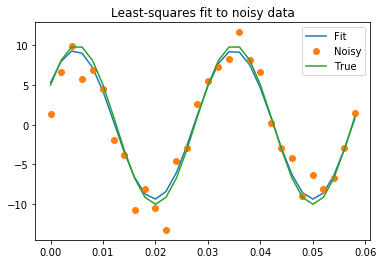

In [22]:
# and plot the true function, measured (noisy) data 
# and the model function with fitted parameters 
plt.plot(x, peval(x, plsq[0]), x, y_meas, 'o', x, y_true)

plt.title('Least-squares fit to noisy data')
plt.legend(['Fit', 'Noisy', 'True'])
plt.show()

<br>
<hr style="border: solid 1px red; margin-bottom: 2% ">
## Special functions
<hr style="border: solid 1px red; margin-bottom: -1%; ">
<br>

* SciPy contains huge set of special functions 
  * Bessel functions
  * Legendre functions
  * Gamma functions 
  * Airy functions 
 
We will see special functions used in the following sections.
<br>


<br>
<hr style="border: solid 1px red; margin-bottom: 2% ">
## Example: `scipy.special`
<hr style="border: solid 1px red; margin-bottom: -1%; ">
<br>

* Many problems with circular or cylindrical symmetry have solutions involving Bessel functions
* E.g., height of a oscillating drumhead related to $J_n(x)$

We will use

http://docs.scipy.org/doc/scipy-0.14.0/reference/special.html
<br>
<br>

In [24]:
# drumhead example
from scipy import special

def drumhead_height(n, k, distance, angle, t):
    # kth zero is last element of returned array
    kth_zero = special.jn_zeros(n, k)[-1]
    return (np.cos(t) * np.cos(n*angle) * special.jn(n, distance*kth_zero))

In [25]:
theta = np.r_[0:2*np.pi:50j]
radius = np.r_[0:1:50j]

x = np.array([r * np.cos(theta) for r in radius])
y = np.array([r * np.sin(theta) for r in radius])
z = np.array([drumhead_height(1, 1, r, theta, 0.5)
              for r in radius])
# contd...

<br>
<hr style="border: solid 1px red; margin-bottom: 2% ">
## Drumhead (cont.)
<hr style="border: solid 1px red; margin-bottom: -1%; ">
<br>

Plot the height of a drumhead using a 3-d axis set
 

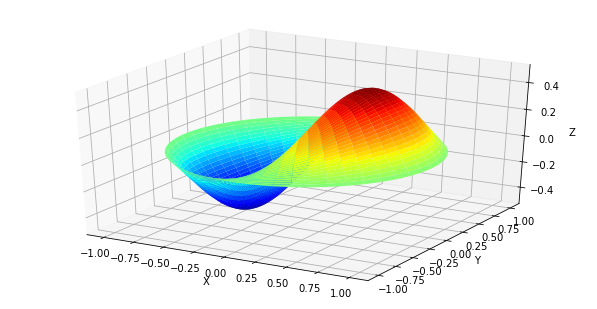

In [26]:
# ...contd
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure(figsize=(8, 4))
ax = Axes3D(fig)
ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap=cm.jet)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

<br>
<hr style="border: solid 1px red; margin-bottom: 2% ">
## Summary
<hr style="border: solid 1px red; margin-bottom: -1%; ">
<br>

* <p style="font-size: 100%">As we have seen, SciPy has a wide range of useful functionality for scientific computing. </p>


* <p style="font-size: 100%">In case it does not have what you need, there are other packages with specialised functionality. </p>

#### Other packages

* <p style="font-size: 100%">Pandas</p>

  * <p style="font-size: 100%">Offers R-like statistical analysis of numerical tables and time series</p>


* <p style="font-size: 100%">SymPy</p>

  * <p style="font-size: 100%">Python library for symbolic computing</p>


* <p style="font-size: 100%">scikit-image</p>

  * <p style="font-size: 100%">Advanced image processing</p>
  
  
* <p style="font-size: 100%">scikit-learn</p>

  * <p style="font-size: 100%">Package for machine learning</p>
  
  
* <p style="font-size: 100%">Sage</p>

  * <p style="font-size: 100%">Open source replacement for Mathematica / Maple / Matlab (built using Python)</p>

<br>

